In [35]:
from additional_test_set import AdditionalTestSet

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from imblearn.ensemble import BalancedRandomForestClassifier

from simple_ml_models import *
from utils import *
from additional_test_set_visualisation import Visualisation
from dimension_reduction import display_umap_2d_plot, display_pca_2d_plot, display_tsne_2d_plot

In [36]:
train_data_path = "data/SingleCell_new_split/newSplitTrainCounts.tsv"
test_data_path = "data/SingleCell_new_split/newSplitTestACounts.tsv"
train_classes_path = "data/SingleCell_new_split/newSplitTrainSamples.tsv"
test_classes_path = "data/SingleCell_new_split/newSplitTestASamples.tsv"
SEED = 42

data_object = AdditionalTestSet(
    train_data_path, test_data_path, train_classes_path, test_classes_path
)
data_object.summary()

Total cells number in train data: 176
CTC cells number in train data: 130
WBC cells number in train data: 38
CTC-WBC cells number in test data: 8

Total cells number in test data: 181
CTC cells number in test data: 132
WBC cells number in test data: 43
CTC-WBC cells number in test data: 6


In [37]:
cut_by_mean_train_data, cut_by_mean_test_data = AdditionalTestSet.cut_data_by_mean(
    data_object.train_data, data_object.test_data, threshold=0.3
)
(
    cut_by_mean_max_train_data,
    cut_by_mean_max_test_data,
) = AdditionalTestSet.cut_data_by_max(
    cut_by_mean_train_data, cut_by_mean_test_data, threshold=5
)
print(f"Feature number: {len(cut_by_mean_max_train_data.columns)}")

Feature number: 67


In [38]:
calculate_global_statistics(cut_by_mean_max_train_data, data_object.train_classes)

CTC mean: 1.3878185937553742
WBC mean: 1.5953677170154843
CTC standard deviation: 1.4652900397345212
WBC standard deviation: 1.6676982620698146
CTC non-zero values: 70.62513519359723 %
WBC non-zero values: 69.87431264728987 %
T-test p-values: 0.00022222264604727357


/home/melehean/miniconda3/envs/gumed/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


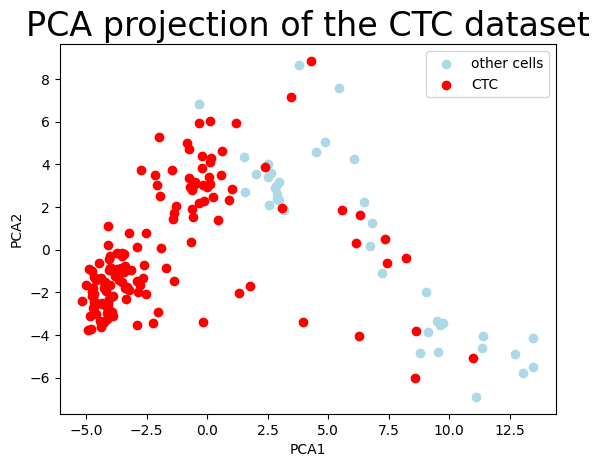

In [39]:
display_pca_2d_plot(cut_by_mean_max_train_data, data_object.train_classes, 42)

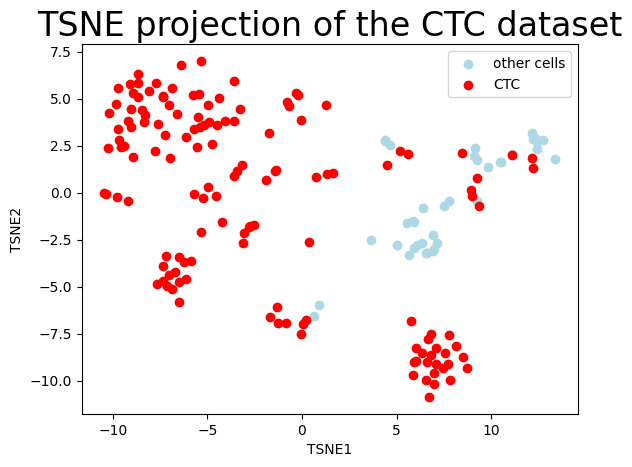

In [40]:
display_tsne_2d_plot(cut_by_mean_max_train_data, data_object.train_classes, 42)

In [41]:
cut_by_mean_with_classes_train_data, cut_by_mean_with_classes_test_data = data_object.cut_data_by_mean_with_classes(
    data_object.train_data, data_object.test_data, threshold=1.6
)
print(f"Feature number: {len(cut_by_mean_with_classes_train_data.columns)}")

Feature number: 67


In [42]:
calculate_global_statistics(cut_by_mean_with_classes_train_data, data_object.train_classes)

CTC mean: 2.183716460783793
WBC mean: 2.3405462298330475
CTC standard deviation: 1.0421085708740032
WBC standard deviation: 1.1590088328941146
CTC non-zero values: 95.18710793856803 %
WBC non-zero values: 94.10840534171248 %
T-test p-values: 3.004350923767403e-16


/home/melehean/miniconda3/envs/gumed/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


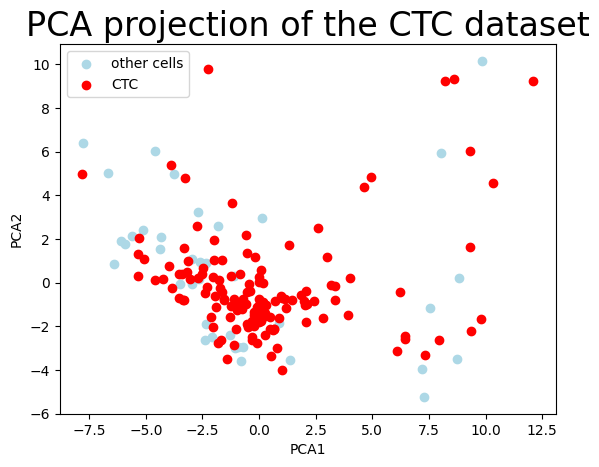

In [43]:
display_pca_2d_plot(cut_by_mean_with_classes_train_data, data_object.train_classes, 42)

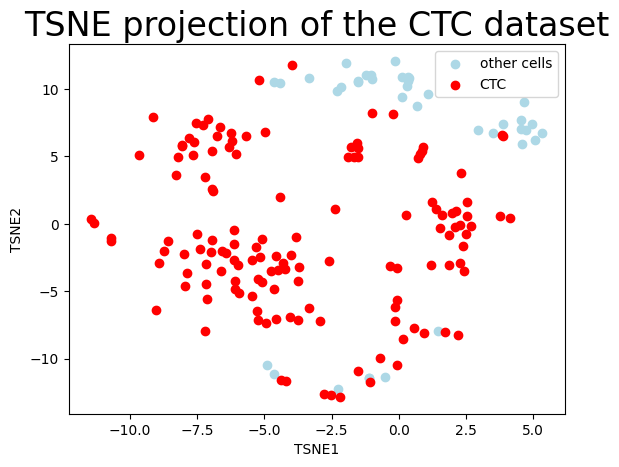

In [44]:
display_tsne_2d_plot(cut_by_mean_with_classes_train_data, data_object.train_classes, 42)

In [45]:
biological_features = pd.read_csv("features/macrophages_vs_others_gbm_emt_v2_2023-05-17.tsv", sep=",")
biological_features = np.array(biological_features["Symbol"])
cut_by_mean_with_classes_features = np.array(cut_by_mean_with_classes_train_data.columns)
cut_by_mean_max_features = np.array(cut_by_mean_max_train_data.columns)
cut_by_mean_with_classes_common_features = np.intersect1d(biological_features, cut_by_mean_with_classes_features)
cut_by_mean_max_common_features = np.intersect1d(biological_features, cut_by_mean_max_features)

print(f"Common features for cut by mean with classes: {cut_by_mean_with_classes_common_features}")
print(f"Common features for cut by mean and max: {cut_by_mean_max_common_features}")

Common features for cut by mean with classes: []
Common features for cut by mean and max: []


### Biological features

In [46]:
biological_features = np.intersect1d(biological_features, data_object.train_data.columns)
biological_features_train_data = data_object.train_data[biological_features]
biological_features_test_data = data_object.test_data[biological_features]

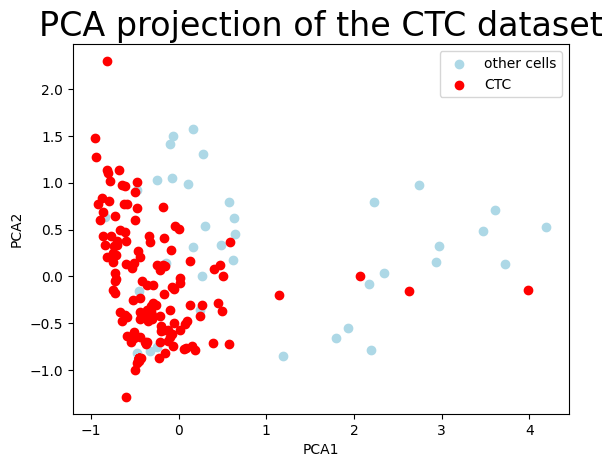

In [47]:
display_pca_2d_plot(biological_features_train_data, data_object.train_classes, 42)

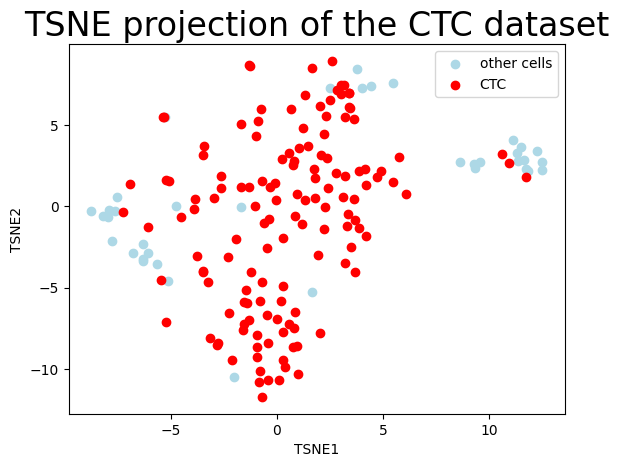

In [48]:
display_tsne_2d_plot(biological_features_train_data, data_object.train_classes, 42)

### Cut by mean max and biological

In [49]:
cut_by_mean_max_features_merged = np.unique(np.concatenate((cut_by_mean_max_features, biological_features)))
cut_by_mean_max_merged_train_data = data_object.train_data[cut_by_mean_max_features_merged]
cut_by_mean_max_merged_test_data = data_object.test_data[cut_by_mean_max_features_merged]

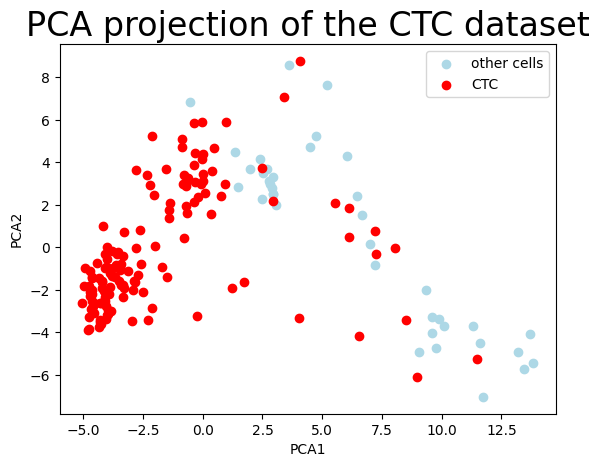

In [50]:
display_pca_2d_plot(cut_by_mean_max_merged_train_data, data_object.train_classes, 42)

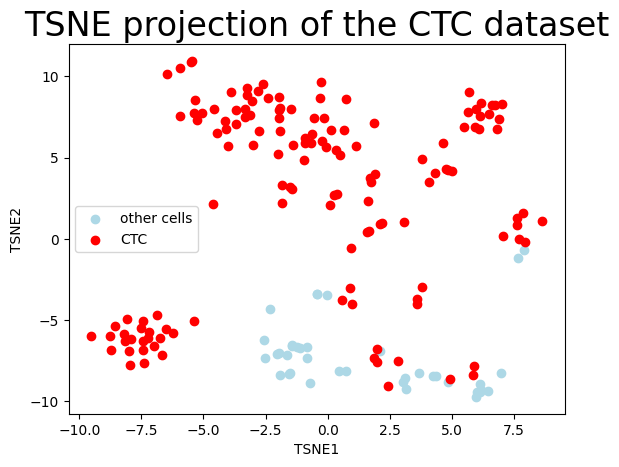

In [51]:
display_tsne_2d_plot(cut_by_mean_max_merged_train_data, data_object.train_classes, 42)

### Cut by mean with classes and biological

In [52]:
cut_by_mean_with_classes_features_merged = np.unique(np.concatenate((cut_by_mean_with_classes_features, biological_features)))
cut_by_mean_with_classes_merged_train_data = data_object.train_data[cut_by_mean_with_classes_features_merged]
cut_by_mean_with_classes_merged_test_data = data_object.test_data[cut_by_mean_with_classes_features_merged]

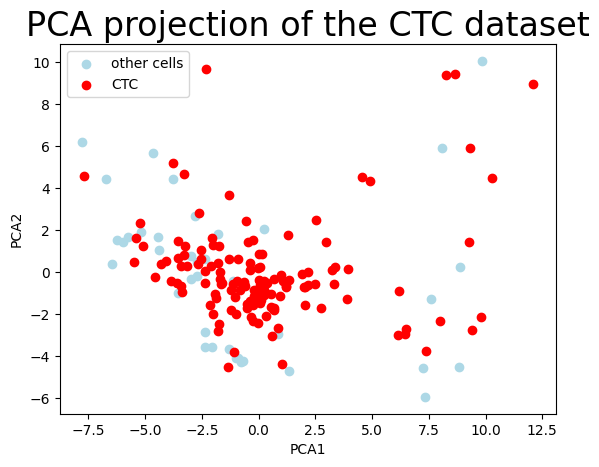

In [53]:
display_pca_2d_plot(cut_by_mean_with_classes_merged_train_data, data_object.train_classes, 42)

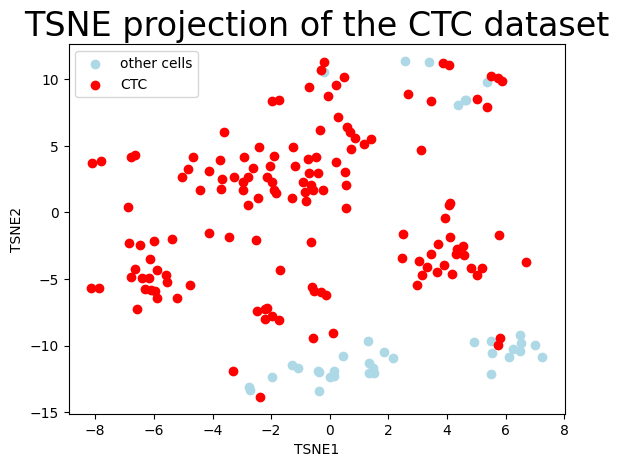

In [54]:
display_tsne_2d_plot(cut_by_mean_with_classes_merged_train_data, data_object.train_classes, 42)

### LightGBM

In [55]:
lgbm_clf = LGBMClassifier(
    boosting_type="gbdt",
    min_child_weight=0.01,
    max_depth=10,
    num_leaves=16,
    n_estimators=2000,
    subsample_for_bin=10000,
    is_unbalance=True,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [56]:
lgbm_model_object = Model(
    lgbm_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()


Validation balanced accuracy 0.7846989966555183
Training balanced accuracy 0.9866666666666667

Validation roc auc 0.9421451133407656
Training roc auc 0.9991304347826087

Validation precision 0.9041077969649397
Training precision 0.992831541218638

Validation recall 0.9347826086956522
Training recall 1.0

Validation f1 0.917366468118348
Training f1 0.9963963963963964



In [57]:
lgbm_model_object.display_test_results()


Test balanced accuracy 0.8278564206268958

Test roc auc 0.9330412313223233

Test precision 0.915165126843959

Test recall 0.9347826086956522

Test f1 score 0.9247751536719507


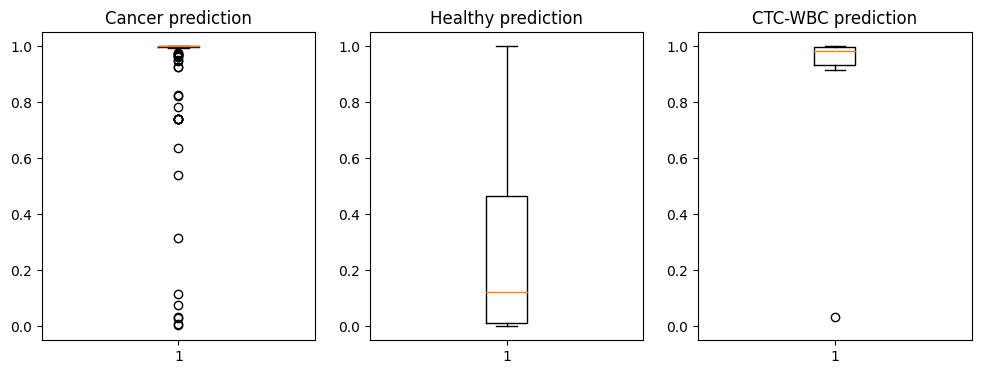

In [58]:
vis = Visualisation(lgbm_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

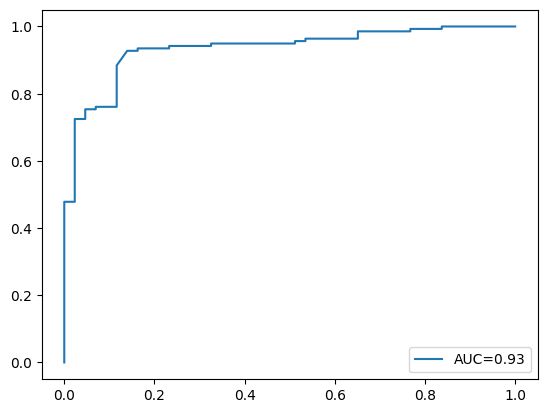

In [59]:
vis.draw_roc_curve_from_probabilities()

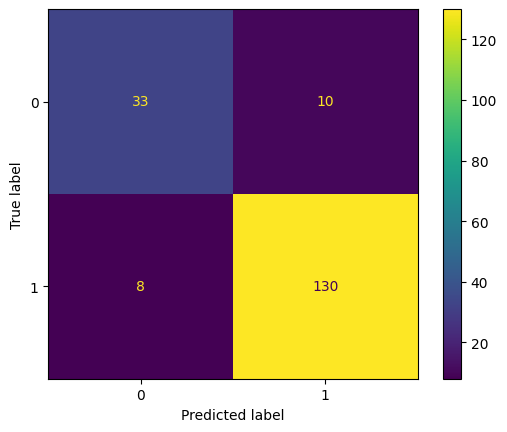

In [60]:
vis.display_confusion_matrix()

In [61]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,1521.333333
MYCBP2,529.666667
TWISTNB,223.000000
MYCBP,161.333333
MYC,145.333333
CD14,96.000000
ZEB1,55.666667
IL3RA,39.333333
ZEB2-AS1,21.666667
MYCBP2-AS1,11.666667


### Cut by mean max and biological

In [62]:
lgbm_model_object = Model(
    lgbm_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()

Validation balanced accuracy 0.9130899293942772
Training balanced accuracy 1.0

Validation roc auc 0.9783537718320326
Training roc auc 1.0

Validation precision 0.9644324913427903
Training precision 1.0

Validation recall 0.9565217391304347
Training recall 1.0

Validation f1 0.9597580814612158
Training f1 1.0



In [63]:
lgbm_model_object.display_test_results()


Test balanced accuracy 0.9145320750477475

Test roc auc 0.9813504100662848

Test precision 0.957101689358251

Test recall 0.9685990338164251

Test f1 score 0.9627718040621266


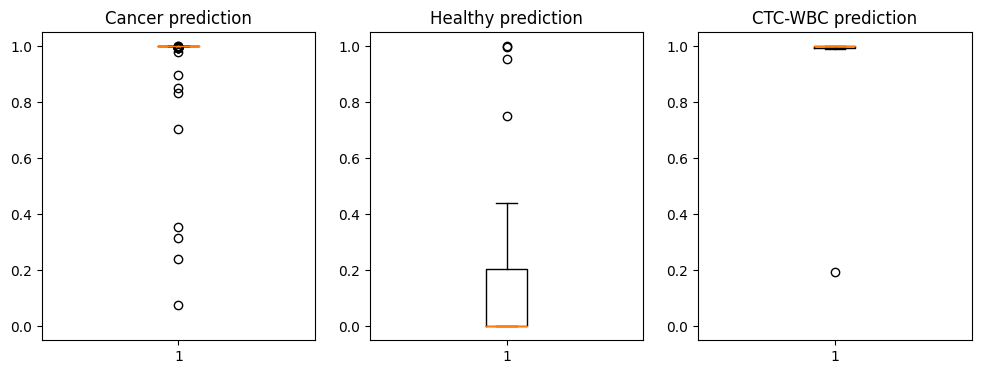

In [64]:
vis = Visualisation(lgbm_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

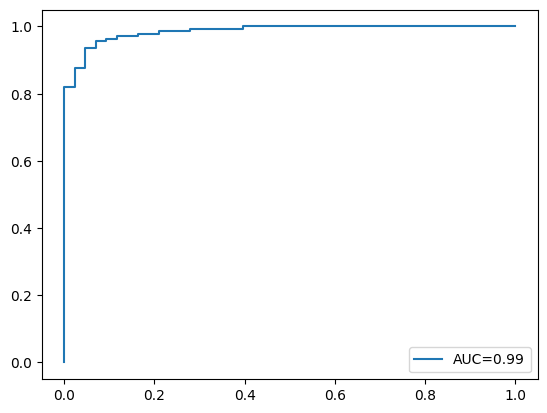

In [65]:
vis.draw_roc_curve_from_probabilities()

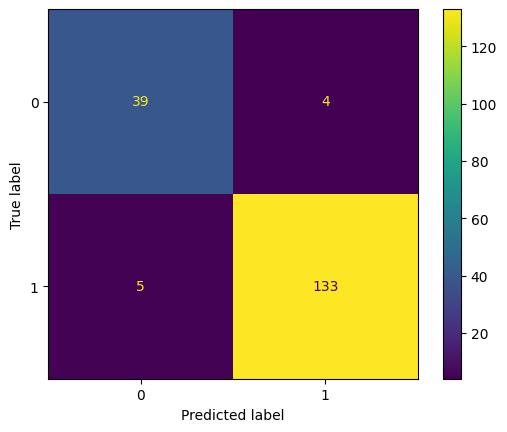

In [66]:
vis.display_confusion_matrix()

In [67]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
HLA-E,69.333333
ACTG1,39.666667
KRT19,35.333333
ZEB2,34.333333
SPINT2,34.000000
...,...
NR4A1,1.333333
PF4,0.666667
MGP,0.666667
MYCBP2-AS1,0.666667


### Cut by mean with classes and biological

In [68]:
lgbm_model_object = Model(
    lgbm_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
lgbm_estimators = lgbm_model_object.main_cycle()

Validation balanced accuracy 0.9139725009290226
Training balanced accuracy 1.0

Validation roc auc 0.977889260497956
Training roc auc 1.0

Validation precision 0.9703703703703704
Training precision 1.0

Validation recall 0.9347826086956522
Training recall 1.0

Validation f1 0.9521340083137835
Training f1 1.0



In [69]:
lgbm_model_object.display_test_results()

Test balanced accuracy 0.9106561060554994

Test roc auc 0.9792158184473655

Test precision 0.9548417603945012

Test recall 0.9685990338164251

Test f1 score 0.9616468970259583


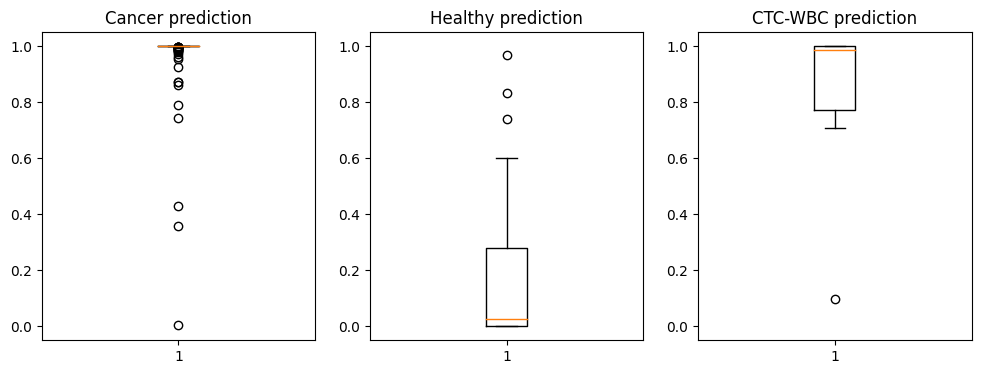

In [70]:
vis = Visualisation(lgbm_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

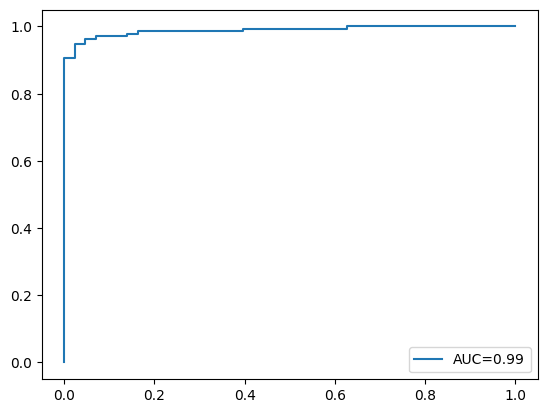

In [71]:
vis.draw_roc_curve_from_probabilities()

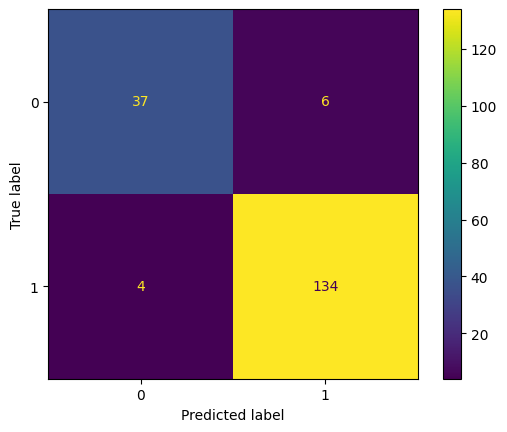

In [72]:
vis.display_confusion_matrix()

In [73]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(lgbm_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ACTG1,92.333333
FTL,56.000000
ZEB2,50.666667
B2M,37.666667
TPT1,37.333333
...,...
RPL4,0.666667
RPL30,0.666667
ZEB2-AS1,0.666667
IL3RA,0.333333


### XGBoost

In [74]:
healthy_cells_train_indices = np.where(data_object.train_classes == 0)[0]
cancer_cells_train_indices = np.where(data_object.train_classes == 1)[0]

class_weight = len(healthy_cells_train_indices) / len(cancer_cells_train_indices)

xgb_clf = XGBClassifier(
    booster="gbtree",
    eta=0.2,
    min_child_weight=4,  # Jedyna zmiana w porownaniu do poprzedniego podzialu
    max_depth=8,
    gamma=0.01,   
    scale_pos_weight=class_weight,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [75]:
xgboost_model_object = Model(
    xgb_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.8320327015979191
Training balanced accuracy 0.8800836120401337

Validation roc auc 0.8669175027870679
Training roc auc 0.9291583054626532

Validation precision 0.94494301994302
Training precision 0.9725490196078432

Validation recall 0.8478260869565218
Training recall 0.8514492753623188

Validation f1 0.8928879601930219
Training f1 0.9066188966974416



In [76]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.8345129760701044

Test roc auc 0.8777103696213908

Test precision 0.937037037037037

Test recall 0.8550724637681159

Test f1 score 0.8938441260146689


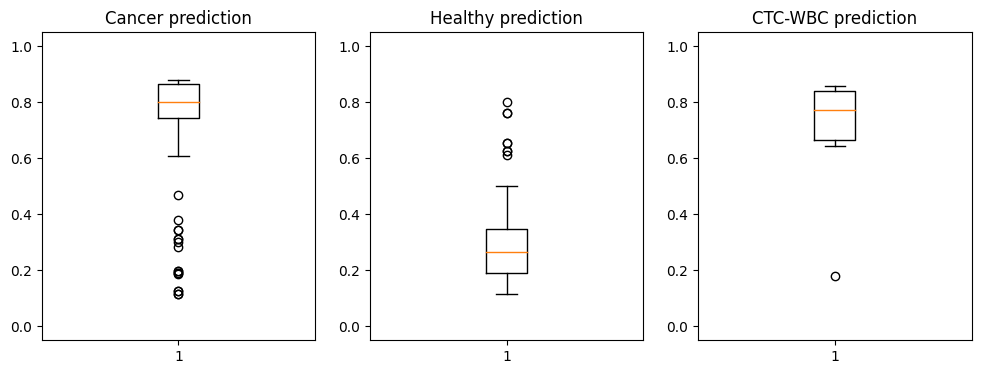

In [77]:
vis = Visualisation(xgboost_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

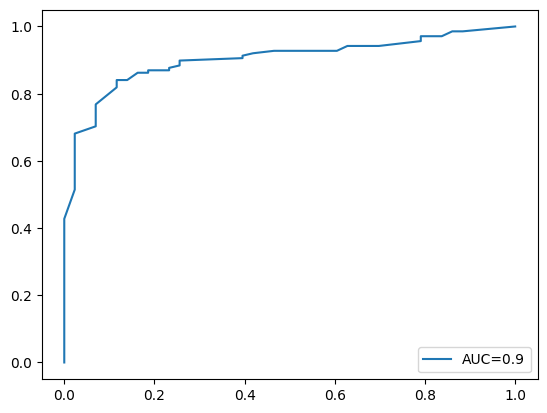

In [78]:
vis.draw_roc_curve_from_probabilities()

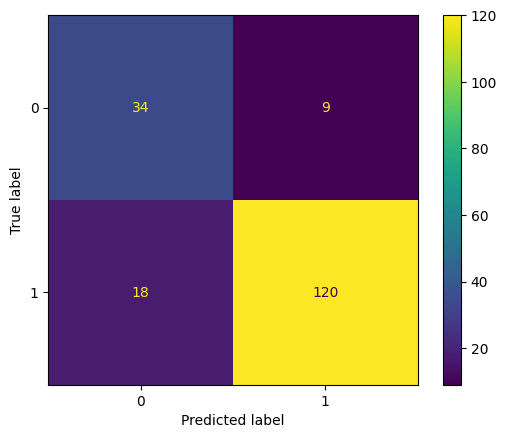

In [79]:
vis.display_confusion_matrix()

In [80]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,0.747207
TWISTNB,0.105900
MYCBP,0.105303
MYCBP2,0.041590


### Cut by mean max and biological

In [81]:
xgboost_model_object = Model(
    xgb_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.906122259383129
Training balanced accuracy 0.9655797101449276

Validation roc auc 0.9572649572649571
Training roc auc 0.9878483835005575

Validation precision 0.9760765550239235
Training precision 1.0

Validation recall 0.8913043478260869
Training recall 0.9311594202898551

Validation f1 0.9306878306878308
Training f1 0.9642137803935557



In [82]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.9155431973935513

Test roc auc 0.9723907426131895

Test precision 0.9652580384958641

Test recall 0.9396135265700484

Test f1 score 0.9522076978939724


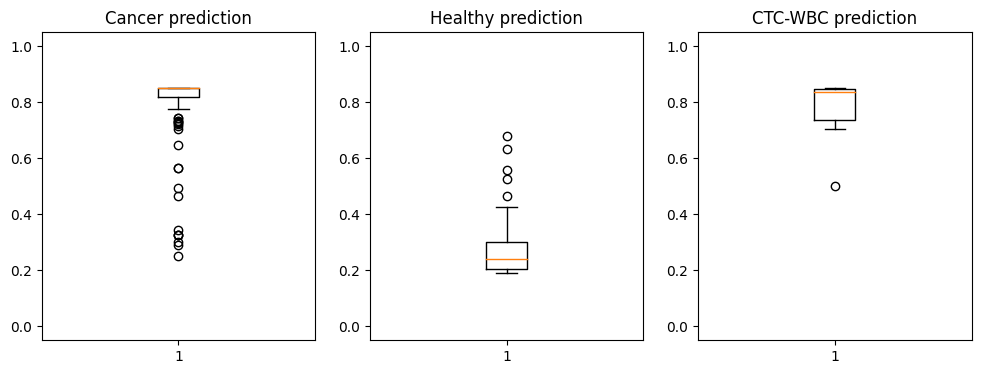

In [83]:
vis = Visualisation(xgboost_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

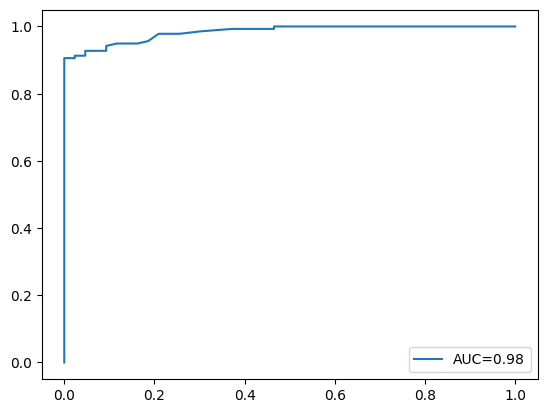

In [84]:
vis.draw_roc_curve_from_probabilities()

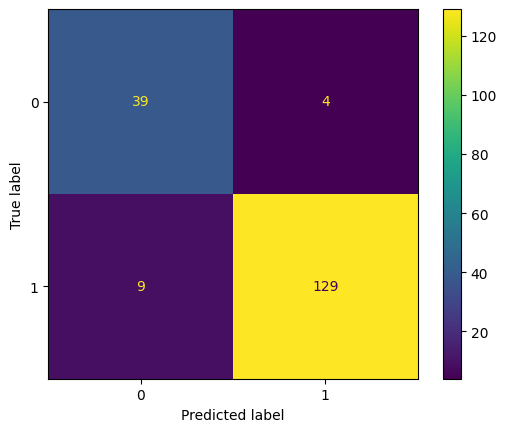

In [85]:
vis.display_confusion_matrix()

In [86]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
KRT19,0.483179
HLA-E,0.212178
LMNA,0.185400
ZEB2,0.048935
CCL4,0.044129
CD74,0.026180


### Cut by mean with classes and biological

In [87]:
xgboost_model_object = Model(
    xgb_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
xgboost_estimators = xgboost_model_object.main_cycle()

Validation balanced accuracy 0.8715626161278335
Training balanced accuracy 0.9486231884057971

Validation roc auc 0.9604236343366778
Training roc auc 0.9889520624303234

Validation precision 0.9682539682539683
Training precision 0.9925093632958801

Validation recall 0.8478260869565218
Training recall 0.9239130434782608

Validation f1 0.9017039438495377
Training f1 0.9567831242744624



In [88]:
xgboost_model_object.display_test_results()

Test balanced accuracy 0.9163015391529042

Test roc auc 0.966183574879227

Test precision 0.9719534452539943

Test recall 0.9178743961352657

Test f1 score 0.9438018966626848


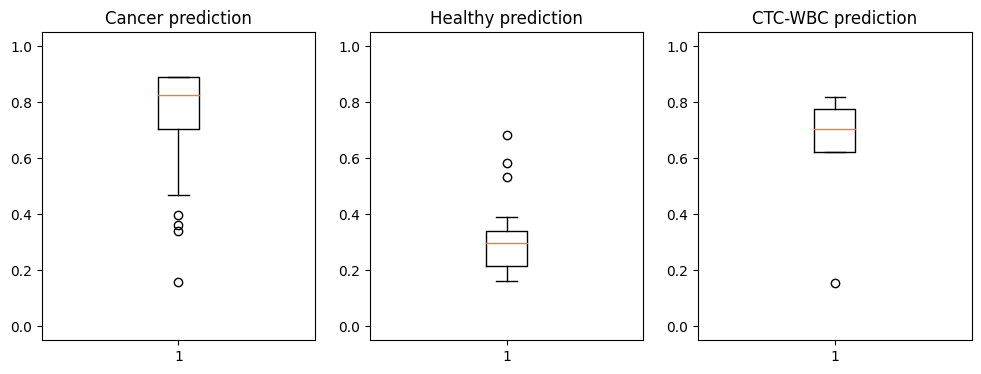

In [89]:
vis = Visualisation(xgboost_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

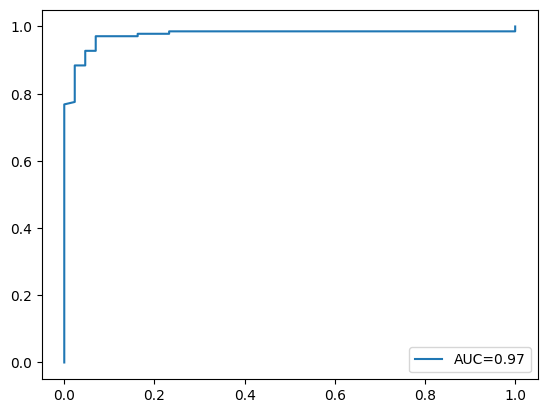

In [90]:
vis.draw_roc_curve_from_probabilities()

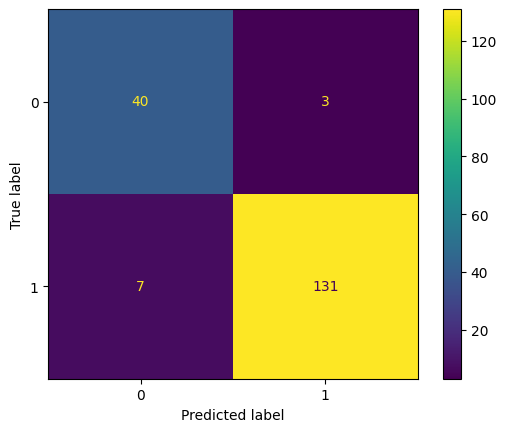

In [91]:
vis.display_confusion_matrix()

In [92]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(xgboost_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
FTL,0.289950
ACTG1,0.260159
ZEB2,0.173440
TPT1,0.132928
B2M,0.048074
TMSB4X,0.042595
HLA-C,0.024367
TAGLN2,0.019106
ITM2B,0.008575
RPLP2,0.000806


### Random Forest

In [93]:
rf_clf = RandomForestClassifier(  
    criterion="log_loss",
    n_estimators=2000,
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [94]:
rf_model_object = Model(
    rf_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.8109438870308435
Training balanced accuracy 1.0

Validation roc auc 0.9285581568190263
Training roc auc 1.0

Validation precision 0.9110144927536231
Training precision 1.0

Validation recall 0.9637681159420289
Training recall 1.0

Validation f1 0.9362922705314011
Training f1 1.0



In [95]:
rf_model_object.display_test_results()

Test balanced accuracy 0.828558588922593

Test roc auc 0.9236602628918099

Test precision 0.9122091858510369

Test recall 0.9516908212560388

Test f1 score 0.9314799454151393


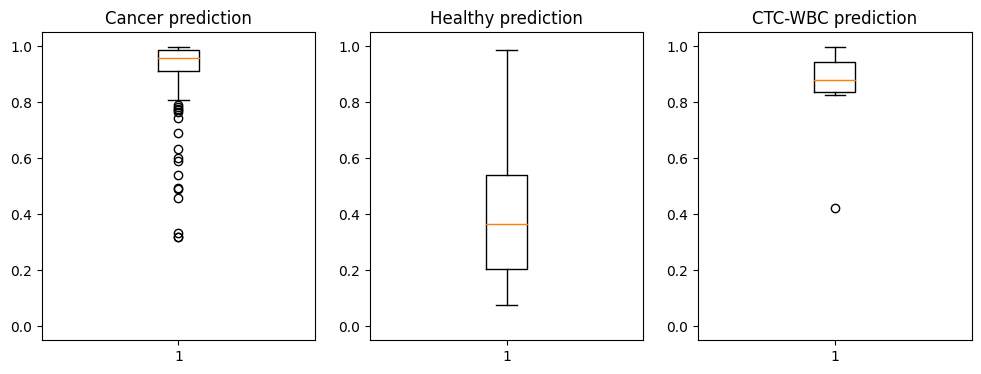

In [96]:
vis = Visualisation(rf_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

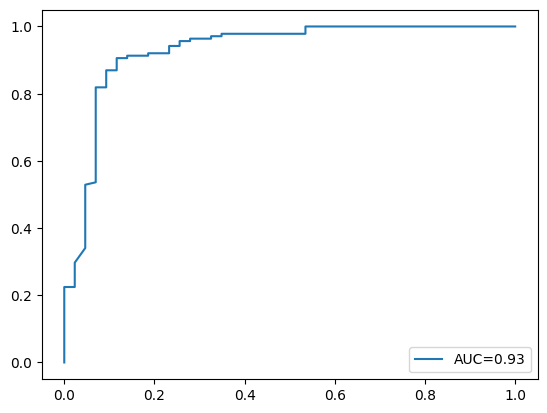

In [97]:
vis.draw_roc_curve_from_probabilities()

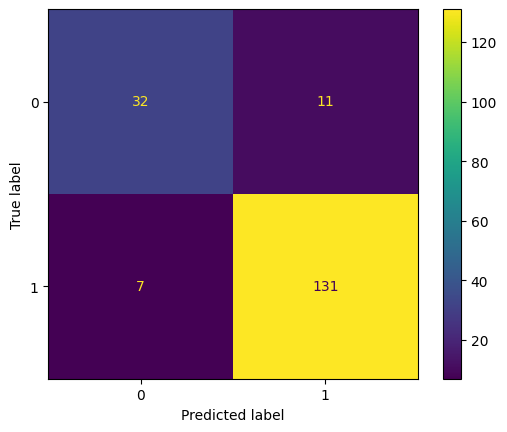

In [98]:
vis.display_confusion_matrix()

In [99]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,0.216890
MYCBP2,0.109590
CD14,0.095462
TWISTNB,0.090181
ZEB2-AS1,0.087060
MYCBP,0.077928
ZEB1,0.053484
SNAI3,0.051355
IL3RA,0.048070
MYCBP2-AS1,0.042634


### Cut by mean max and biological

In [100]:
rf_model_object = Model(
    rf_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.8936269044964696
Training balanced accuracy 1.0

Validation roc auc 0.9881549609810479
Training roc auc 1.0

Validation precision 0.9515731785944553
Training precision 1.0

Validation recall 0.9710144927536232
Training recall 1.0

Validation f1 0.9605436081242534
Training f1 1.0



In [101]:
rf_model_object.display_test_results()

Test balanced accuracy 0.9065273564768003

Test roc auc 0.9907875519604539

Test precision 0.9507117310846157

Test recall 0.9758454106280193

Test f1 score 0.9630636298352712


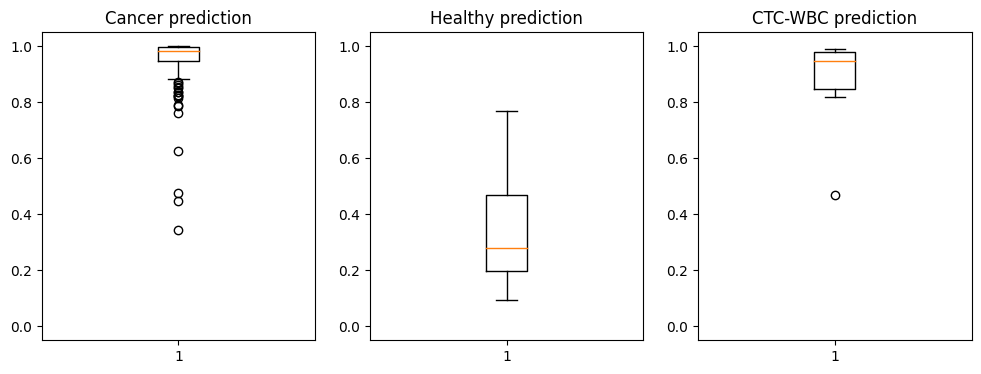

In [102]:
vis = Visualisation(rf_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

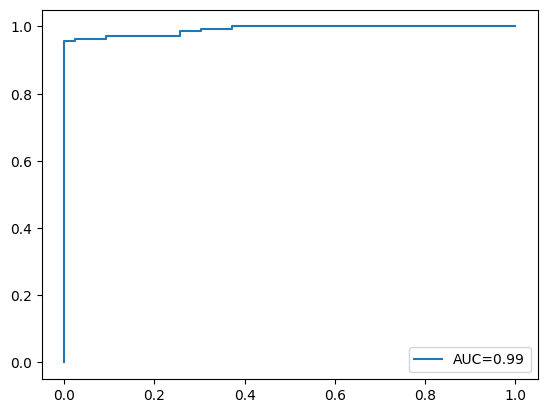

In [103]:
vis.draw_roc_curve_from_probabilities()

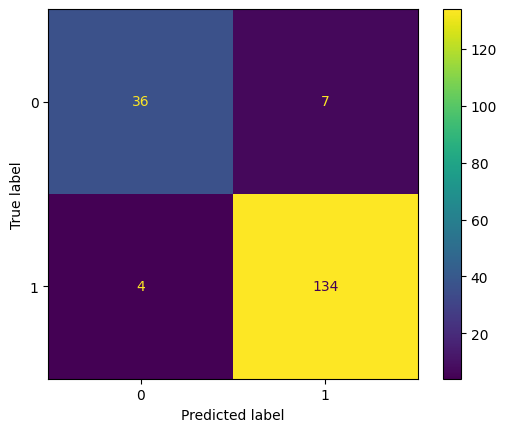

In [104]:
vis.display_confusion_matrix()

In [105]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
KRT19,0.089974
HLA-E,0.078854
LMNA,0.065010
CD74,0.048138
CCL4,0.046153
...,...
SNAI1,0.000384
TWIST1,0.000377
MYCBPAP,0.000108
SNAI2,0.000080


### Cut by mean with classes and biological

In [106]:
rf_model_object = Model(
    rf_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
rf_estimators = rf_model_object.main_cycle()

Validation balanced accuracy 0.8906075808249722
Training balanced accuracy 1.0

Validation roc auc 0.983974358974359
Training roc auc 1.0

Validation precision 0.9448696145124718
Training precision 1.0

Validation recall 0.9927536231884058
Training recall 1.0

Validation f1 0.9681970884658454
Training f1 1.0



In [107]:
rf_model_object.display_test_results()

Test balanced accuracy 0.8621784069205708

Test roc auc 0.9904224244466914

Test precision 0.9238204896099633

Test recall 0.9879227053140096

Test f1 score 0.9546481742579424


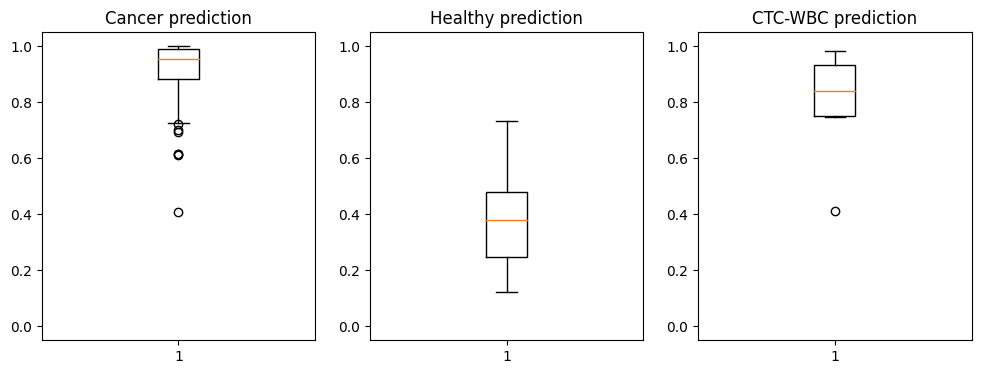

In [108]:
vis = Visualisation(rf_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

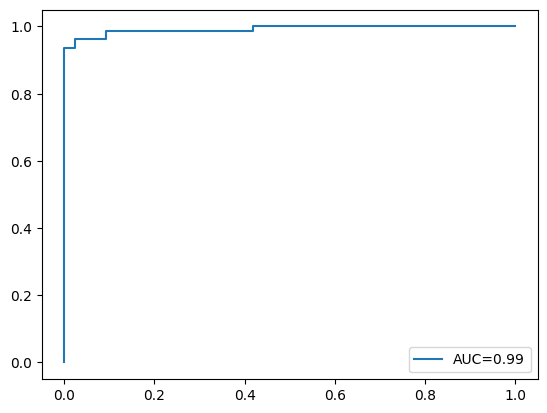

In [109]:
vis.draw_roc_curve_from_probabilities()

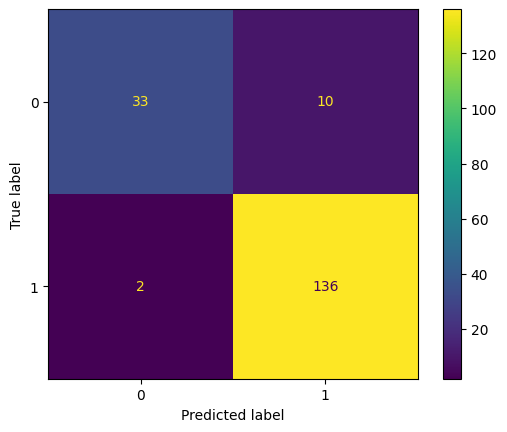

In [110]:
vis.display_confusion_matrix()

In [111]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(rf_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
FTL,0.068040
ZEB2,0.060653
ACTG1,0.059680
B2M,0.059061
TPT1,0.052508
...,...
TWIST1,0.000489
SNAI1,0.000488
MYCBPAP,0.000120
SNAI2,0.000117


### Balanced Random Forest

In [112]:
brf_clf = BalancedRandomForestClassifier(
    n_estimators=2000,
    class_weight="balanced",
    criterion="entropy",
    oob_score=True,  
    n_jobs=12,
    random_state=SEED,
)

### Biological features

In [113]:
brf_model_object = Model(
    brf_clf,
    biological_features_train_data,
    data_object.train_classes,
    biological_features_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.8445745076179859
Training balanced accuracy 0.9673913043478262

Validation roc auc 0.9388703084355258
Training roc auc 0.9997101449275362

Validation precision 0.939855072463768
Training precision 1.0

Validation recall 0.8985507246376812
Training recall 0.9347826086956522

Validation f1 0.9177620492079542
Training f1 0.9662703837795785



In [114]:
brf_model_object.display_test_results()

Test balanced accuracy 0.8681327940680822

Test roc auc 0.9396977867655321

Test precision 0.9485589346054463

Test recall 0.8913043478260869

Test f1 score 0.9190377699517395


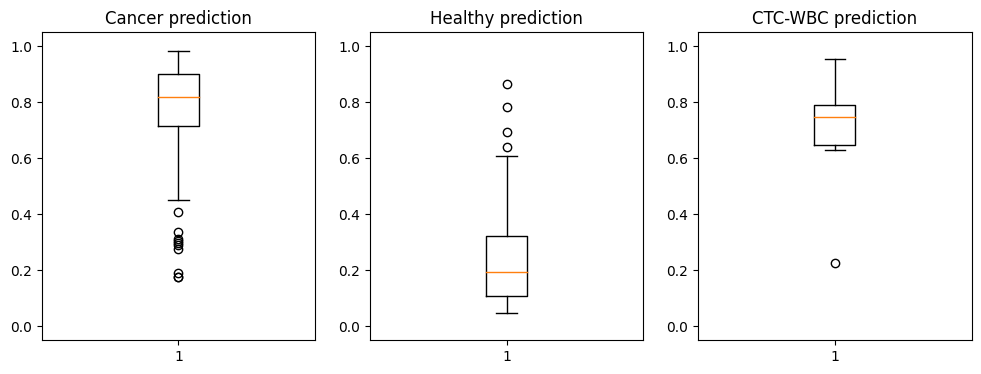

In [115]:
vis = Visualisation(brf_estimators, biological_features_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

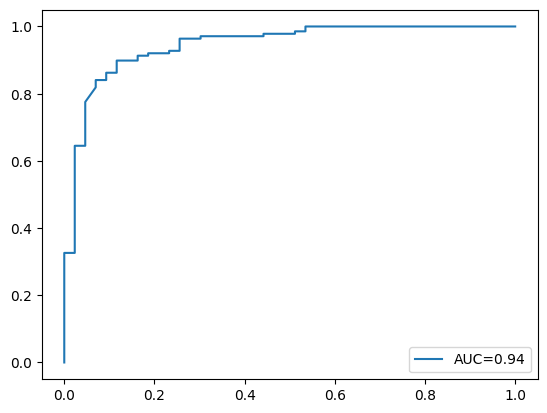

In [116]:
vis.draw_roc_curve_from_probabilities()

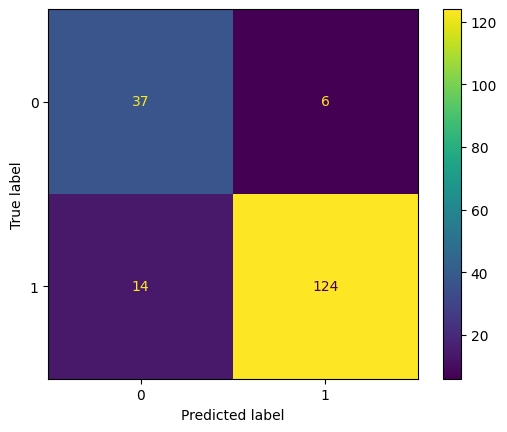

In [117]:
vis.display_confusion_matrix()

In [118]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, biological_features_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
ZEB2,0.211105
MYCBP2,0.114241
MYCBP,0.113011
TWISTNB,0.112049
CD14,0.074814
ZEB2-AS1,0.067612
ZEB1,0.052370
MYC,0.049545
IL3RA,0.040647
MYCBP2-AS1,0.035317


### Cut by mean max and biological 

In [119]:
brf_model_object = Model(
    brf_clf,
    cut_by_mean_max_merged_train_data,
    data_object.train_classes,
    cut_by_mean_max_merged_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.9437012263099219
Training balanced accuracy 0.9746376811594203

Validation roc auc 0.9872259383128948
Training roc auc 1.0

Validation precision 0.9925925925925926
Training precision 1.0

Validation recall 0.9130434782608695
Training recall 0.9492753623188405

Validation f1 0.9503240535626523
Training f1 0.9739706186633561



In [120]:
brf_model_object.display_test_results()

Test balanced accuracy 0.956212785080328

Test roc auc 0.989523649028199

Test precision 0.9851835346933386

Test recall 0.9589371980676328

Test f1 score 0.9718440881457912


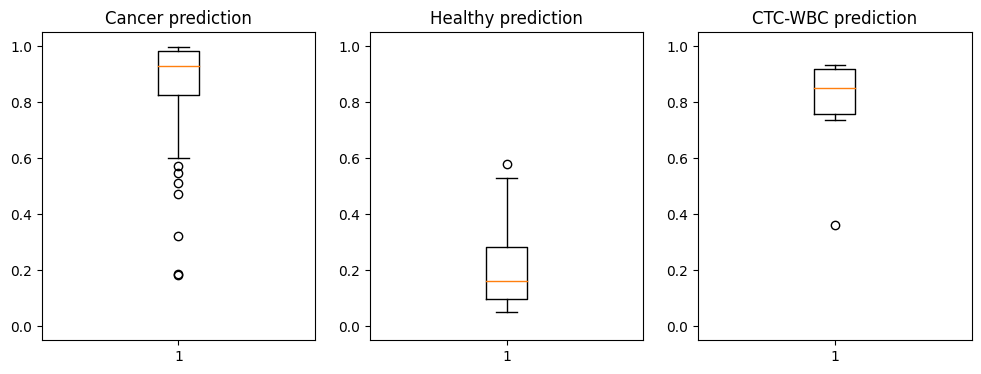

In [121]:
vis = Visualisation(brf_estimators, cut_by_mean_max_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

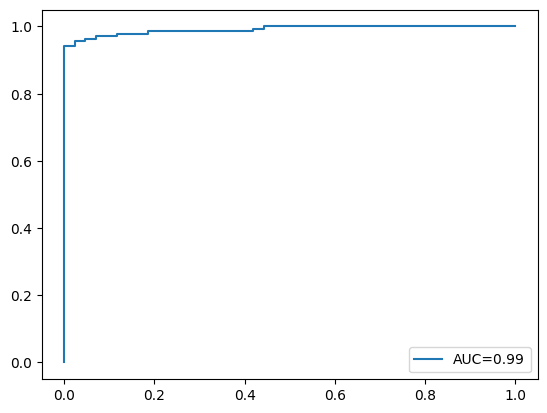

In [122]:
vis.draw_roc_curve_from_probabilities()

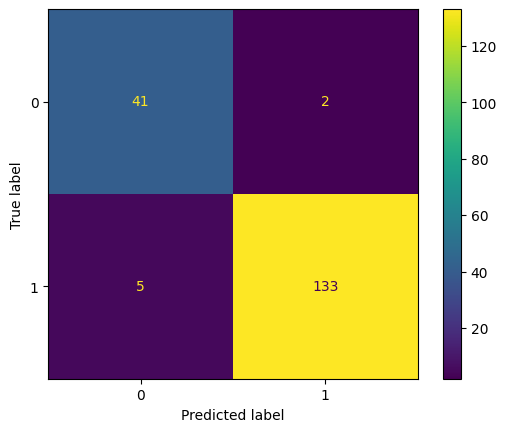

In [123]:
vis.display_confusion_matrix()

In [124]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, cut_by_mean_max_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
KRT19,1.003759e-01
HLA-E,8.244384e-02
LMNA,5.723319e-02
ACTG1,5.613363e-02
FTL,4.956157e-02
...,...
TWIST1,4.655483e-04
MYCBPAP,3.375396e-04
SNAI2,2.450674e-04
SNAI3-AS1,1.820424e-04


### Cut by mean with classes and biological

In [125]:
brf_model_object = Model(
    brf_clf,
    cut_by_mean_with_classes_merged_train_data,
    data_object.train_classes,
    cut_by_mean_with_classes_merged_test_data,
    data_object.test_classes,
    3,
)
brf_estimators = brf_model_object.main_cycle()

Validation balanced accuracy 0.9298123374210331
Training balanced accuracy 0.9873188405797101

Validation roc auc 0.9845782237086586
Training roc auc 1.0

Validation precision 0.9846723044397464
Training precision 1.0

Validation recall 0.9130434782608696
Training recall 0.9746376811594203

Validation f1 0.9473015053022803
Training f1 0.9871287826183215



In [126]:
brf_model_object.display_test_results()

Test balanced accuracy 0.9649196719469723

Test roc auc 0.988119312436805

Test precision 0.9876906318082789

Test recall 0.9685990338164251

Test f1 score 0.9780487152749927


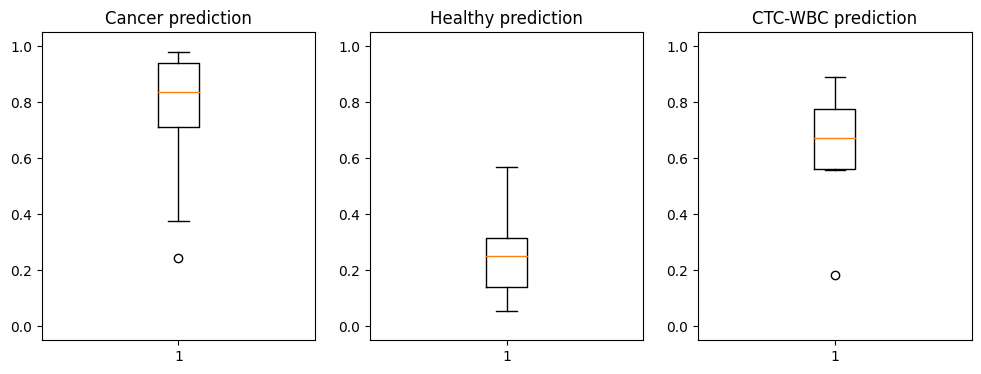

In [127]:
vis = Visualisation(brf_estimators, cut_by_mean_with_classes_merged_test_data, data_object.test_classes, data_object.test_classes_names)
vis.plot_predictions_boxplot()

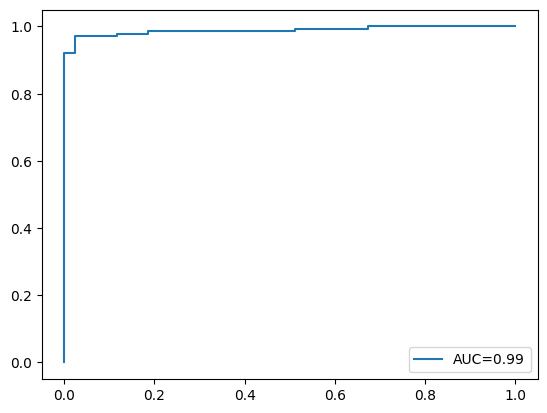

In [128]:
vis.draw_roc_curve_from_probabilities()

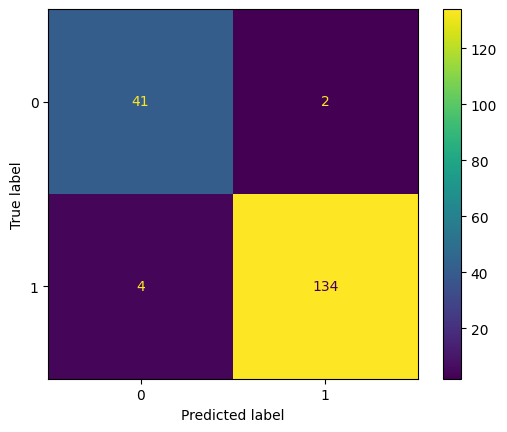

In [129]:
vis.display_confusion_matrix()

In [130]:
reduced_features, feature_importance = get_non_zero_feature_importance_of_tree_base_classifier(brf_estimators, cut_by_mean_with_classes_merged_train_data)
feature_importance.sort_values(ascending=False, by=0)

,0
FTL,0.088103
ACTG1,0.086802
HLA-C,0.056154
TMSB4X,0.050003
B2M,0.042675
...,...
MYCBPAP,0.000842
TWIST1,0.000734
SNAI3-AS1,0.000577
SNAI2,0.000387
